In [100]:
import numpy as np
import pandas as pd
import os
from pathlib import Path

In [115]:
from fedot_ind.api.utils.path_lib import PROJECT_PATH
path_to_datasets = PROJECT_PATH + '/benchmark/results/ts_regression'
path_to_results_2024 = PROJECT_PATH + '/benchmark/results/time_series_multi_reg_comparasion_09022024.csv'
reg_comp =pd.read_csv(path_to_results_2024, sep=';',decimal='.', index_col=0)
for i in os.listdir(path_to_datasets):
    try:
        metric_report = Path(path_to_datasets, i, 'metrics_report.csv')
        data = pd.read_csv(metric_report)
        new_metric = float(data[data['Dataset Name'] == i]['Fedot_Industrial_best'].values)
        old_metric = float(reg_comp.loc[i, ['Fedot_Industrial']].values)
        if new_metric < old_metric:
            print(f"New result for dataset - {i}. Old metric - {old_metric}. New metric - {new_metric}")
            reg_comp.loc[i, ['Fedot_Industrial_best']] = new_metric
    except Exception as e:
        print(f"Error on dataset - {i}")

Error on dataset - AluminiumConcentration
Error on dataset - AppliancesEnergy
Error on dataset - AustraliaRainfall
Error on dataset - BeijingPM10Quality
Error on dataset - BeijingPM25Quality
Error on dataset - BenzeneConcentration
Error on dataset - BIDMC32HR
Error on dataset - BIDMC32SpO2
Error on dataset - BinanceCoinSentiment
Error on dataset - CardanoSentiment
Error on dataset - ChilledWaterPredictor
Error on dataset - comprasion_metrics_report.csv
Error on dataset - comprasion_metrics_report_261222.csv
Error on dataset - Covid3Month
Error on dataset - DailyTemperatureLatitude
Error on dataset - DhakaHourlyAirQuality
Error on dataset - FloodModeling1
Error on dataset - FloodModeling2
Error on dataset - FloodModeling3
Error on dataset - GasSensorArrayAcetone
Error on dataset - GasSensorArrayEthanol
Error on dataset - HouseholdPowerConsumption1
Error on dataset - HouseholdPowerConsumption2
Error on dataset - IEEEPPG
Error on dataset - LiveFuelMoistureContent
Error on dataset - Natura

In [116]:
reg_comp = reg_comp.dropna(axis=0)
reg_comp['Difference %'] = ((reg_comp.iloc[:, :-2].min(axis=1) - reg_comp['Fedot_Industrial_best']) / reg_comp.iloc[:, :-2].min(axis=1)) * 100
reg_comp = reg_comp[reg_comp['Fedot_Industrial_best']!=0]
reg_comp

,1NN-DTW_RMSE,1NN-ED_RMSE,5NN-DTW_RMSE,5NN-ED_RMSE,CNN_RMSE,DrCIF_RMSE,FCN_RMSE,FPCR-Bs_RMSE,FPCR_RMSE,FreshPRINCE_RMSE,...,ROCKET_RMSE,RandF_RMSE,ResNet_RMSE,Ridge_RMSE,RotF_RMSE,SingleInception_RMSE,TSF_RMSE,XGBoost_RMSE,Fedot_Industrial_best,Difference %
HouseholdPowerConsumption1,417.520861,534.266678,363.106601,507.796826,604.549659,165.766677,353.211342,110.606270,107.061828,104.040422,...,214.812814,239.492621,108.828881,203.543701,199.234599,116.202251,276.188294,227.507324,99.97300,3.909463
AppliancesEnergy,5.739470,5.768104,4.504958,4.470334,4.097874,2.404670,4.452677,4.500813,4.419099,2.053976,...,2.768555,3.986324,3.957921,4.695629,2.557591,4.399413,3.752866,4.045985,1.92400,6.328035
HouseholdPowerConsumption2,53.429559,76.024116,43.287550,57.685928,51.529379,30.635327,172.601053,41.344814,40.829072,29.392874,...,30.675485,39.071698,33.304921,57.710924,37.590936,34.585894,36.015731,38.955683,34.37000,-21.725420
IEEEPPG,23.987240,27.769715,20.452884,23.655007,22.426885,12.474585,7.190419,26.398372,26.395514,10.115907,...,7.159721,21.655840,5.051279,47.502751,20.212812,4.119866,20.472003,21.033698,37.44000,-912.390875
FloodModeling1,0.013817,0.018511,0.013124,0.019009,0.017236,0.009463,0.009510,0.020827,0.021319,0.008751,...,0.017304,0.018997,0.009046,0.020951,0.017988,0.010004,0.011029,0.019334,0.00612,4.813172
BeijingPM25Quality,71.066726,73.245699,59.503839,60.872956,99.887573,47.127547,45.523481,61.336023,62.028248,43.418729,...,67.005211,46.711947,44.166483,60.914785,42.839214,42.008177,61.674262,42.147228,60.75000,-50.517886
BenzeneConcentration,4.402315,4.858189,5.053820,4.240799,7.543093,3.666043,0.596533,4.884306,5.241220,2.132254,...,2.217476,0.283166,0.302587,1.132592,0.728738,0.276406,4.189510,0.218806,1.63700,-614.346526
FloodModeling3,0.013074,0.017028,0.011562,0.017738,0.010964,0.006439,0.009331,0.018776,0.019448,0.005583,...,0.017291,0.016680,0.007282,0.019032,0.015684,0.010451,0.008546,0.017007,0.01100,-114.241656
BeijingPM10Quality,118.230571,119.246110,95.318785,97.130645,127.598974,70.572713,70.596483,92.628381,93.047781,66.509446,...,94.557863,71.712571,68.418040,92.350207,66.315628,66.519288,84.657174,66.474818,96.75200,-51.534267
FloodModeling2,0.011092,0.012949,0.012064,0.013299,0.018521,0.005180,0.004745,0.014591,0.013853,0.005028,...,0.009274,0.009483,0.007550,0.014162,0.007900,0.007653,0.005379,0.012971,0.00960,-137.066363


# Compute ranks

In [117]:
clear_csv = reg_comp.iloc[:, :-1]
pd.DataFrame(clear_csv.rank(axis=1).mean(axis=0).sort_values(), columns=['mean rank'])

,mean rank
RIST_RMSE,5.611111
FreshPRINCE_RMSE,5.638889
InceptionT_RMSE,5.861111
DrCIF_RMSE,7.583333
RDST_RMSE,8.722222
ResNet_RMSE,9.277778
MultiROCKET_RMSE,9.638889
SingleInception_RMSE,9.722222
TSF_RMSE,9.805556
RotF_RMSE,10.583333


Fedot.ind has mean rank 11.55. It's the 10'th place comparing with SOTA

# Top-k stats

In [118]:
top_1 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nsmallest(1)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-1']).fillna(0)
top_3 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nsmallest(3)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-3'])
top_5 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nsmallest(5)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-5'])
top_half = pd.DataFrame(clear_csv.T.apply(lambda x: x.nsmallest(7)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-half'])
pd.concat([top_1, top_3, top_5, top_half], axis=1).fillna(0)


,top-1,top-3,top-5,top-half
RDST_RMSE,5.0,6.0,6.0,7
Fedot_Industrial_best,4.0,4.0,5.0,5
InceptionT_RMSE,3.0,8.0,12.0,13
MultiROCKET_RMSE,3.0,3.0,6.0,9
CNN_RMSE,1.0,1.0,1.0,1
DrCIF_RMSE,1.0,2.0,7.0,9
XGBoost_RMSE,1.0,3.0,3.0,4
FreshPRINCE_RMSE,0.0,7.0,11.0,12
RIST_RMSE,0.0,7.0,9.0,12
ResNet_RMSE,0.0,3.0,6.0,10


# Rank Distribution

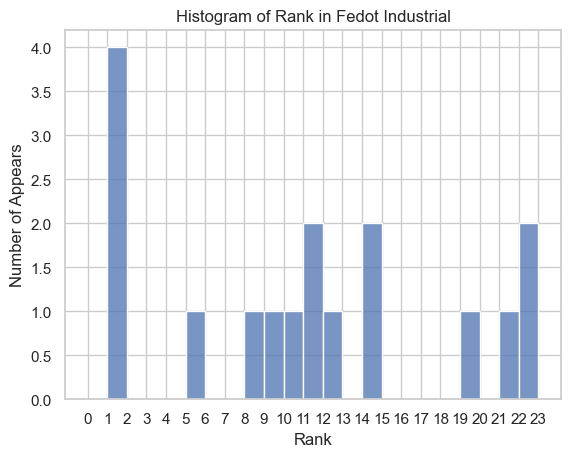

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming clear_csv is a pandas DataFrame and 'Fedot_Industrial' is a column in it
quantiles = clear_csv.rank(axis=1) 
bins = np.arange(clear_csv.shape[1])
# Set the style of the plot
sns.set(style="whitegrid")

# Create a histogram with seaborn
sns.histplot(quantiles.loc[:, 'Fedot_Industrial_best'], bins=bins)

# Add labels and title
plt.xlabel('Rank')
plt.ylabel('Number of Appears')
plt.xticks(bins)
plt.title('Histogram of Rank in Fedot Industrial')

# Show the plot
plt.show()

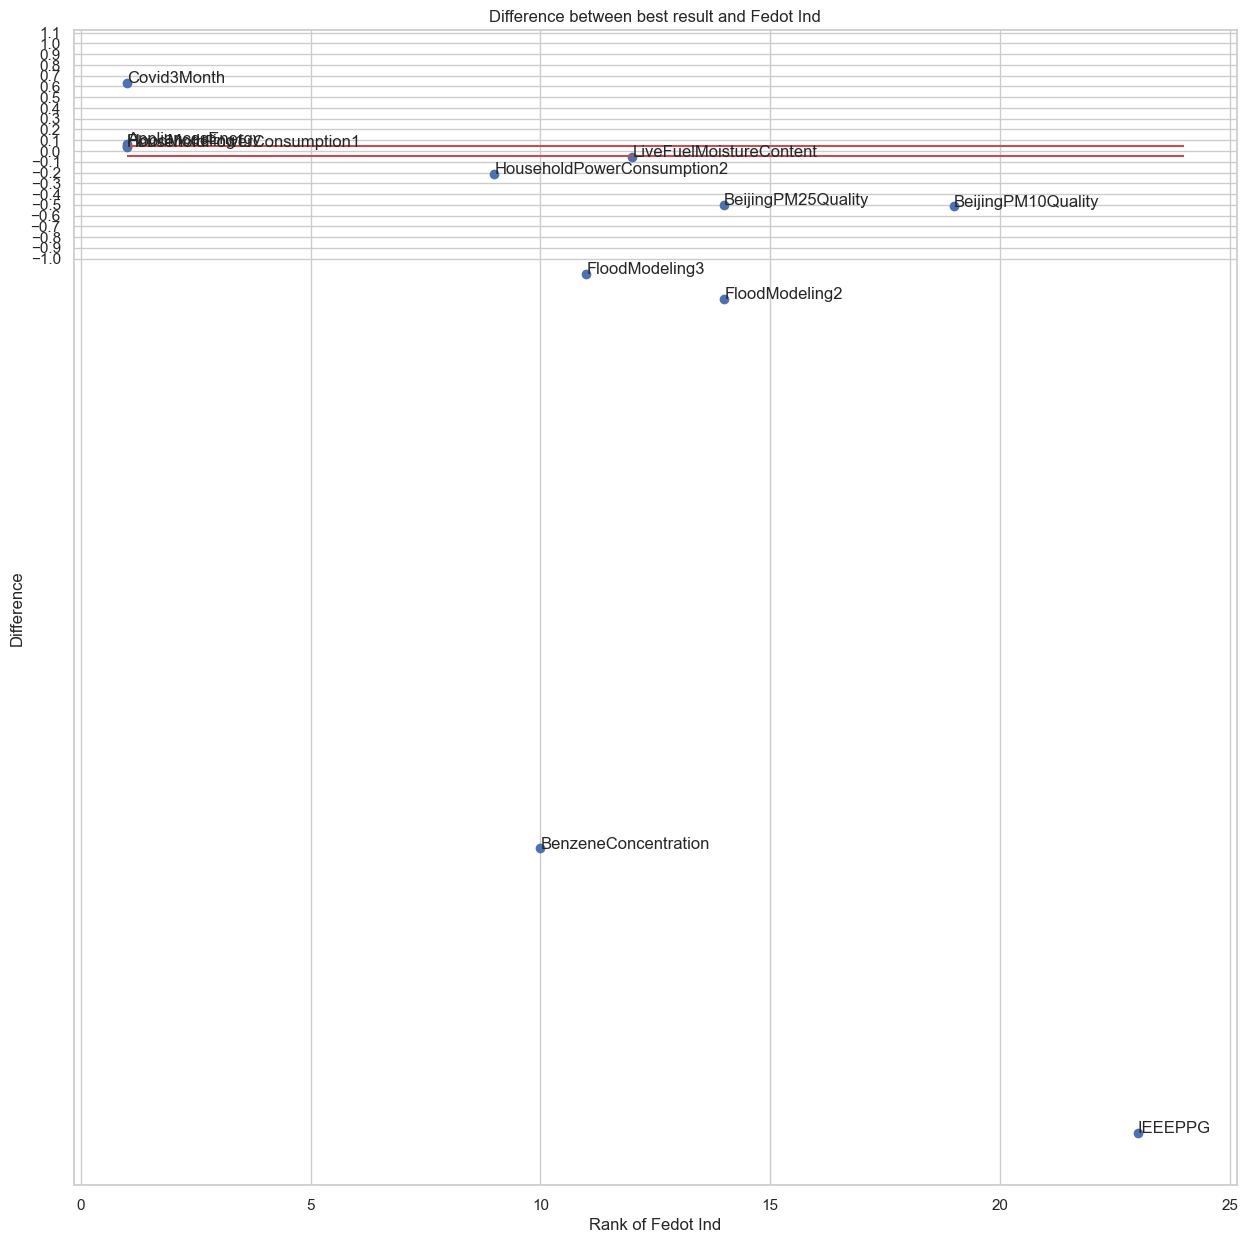

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
# Assuming clear_csv is a pandas DataFrame and 'Fedot_Industrial' is a column in it
quantiles = clear_csv.rank(axis=1, ascending=True) 
differences_from_first_place = (clear_csv.iloc[:, :-1].min(axis=1) - clear_csv['Fedot_Industrial_best']) / clear_csv.iloc[:, :-1].min(axis=1)
# Set the style of the plot
sns.set(style="whitegrid")
plt.yticks(np.arange(-1, 4, 0.1))

# Create a histogram with seaborn
plt.scatter(quantiles.loc[:, 'Fedot_Industrial_best'], differences_from_first_place)
for i in range(len(quantiles.loc[:, 'Fedot_Industrial_best'])):
    plt.annotate(reg_comp.index.values[i], (quantiles.loc[:, 'Fedot_Industrial_best'].values[i], differences_from_first_place.values[i]))

plt.hlines(y = 0.05, xmin = 1, xmax = clear_csv.shape[1], color='r') 
plt.hlines(y = -0.05, xmin = 1, xmax = clear_csv.shape[1], color='r') 
# Add labels and title
plt.xlabel('Rank of Fedot Ind')
plt.ylabel('Difference')
plt.title('Difference between best result and Fedot Ind')

# Show the plot
plt.show()

# Poor solutions

In [123]:
poor_idx = reg_comp.sort_values(by='Difference %', ascending=True).iloc[:5, :].index.values
poor_idx

array(['BIDMC32HR', 'BIDMC32SpO2', 'BIDMC32RR', 'AustraliaRainfall',
       'NewsHeadlineSentiment'], dtype=object)

For BIDMC32HR no results!


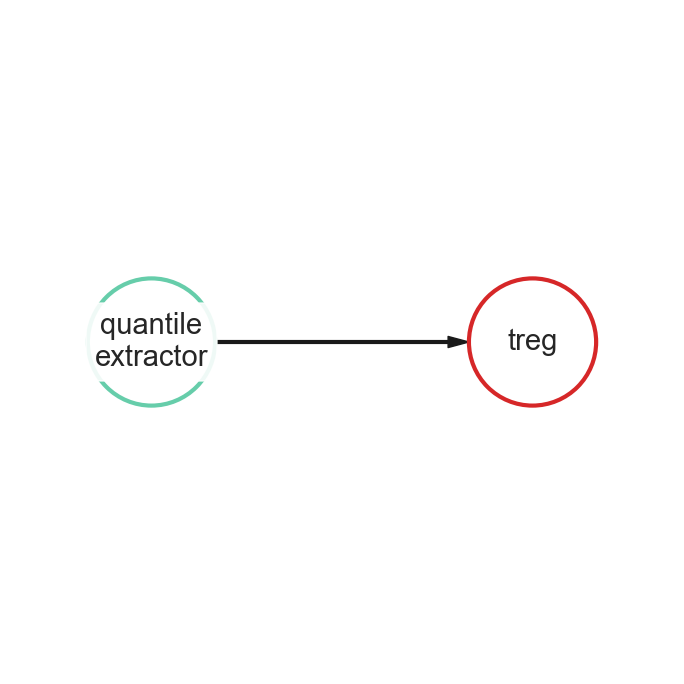

For BIDMC32RR no results!
For AustraliaRainfall no results!
For NewsHeadlineSentiment no results!


In [124]:
import os
from pathlib import Path
from fedot.core.pipelines.pipeline import Pipeline
prefix = 'pipeline_saved'
for idx in poor_idx:
    try:
        best_model = Path(path_to_datasets, idx)
        saved_pipeline = [x for x in os.listdir(best_model) if x.__contains__(prefix)][0]
        best_model = Path(path_to_datasets, idx,  saved_pipeline, f'{saved_pipeline}.json')
        pipeline = Pipeline().load(best_model)
        pipeline.show()
    except:
        print(f'For {idx} no results!')

There are no fittnes_by_generation file that may mean not enough time for composing

# Good solutions

BIDMC32SpO2


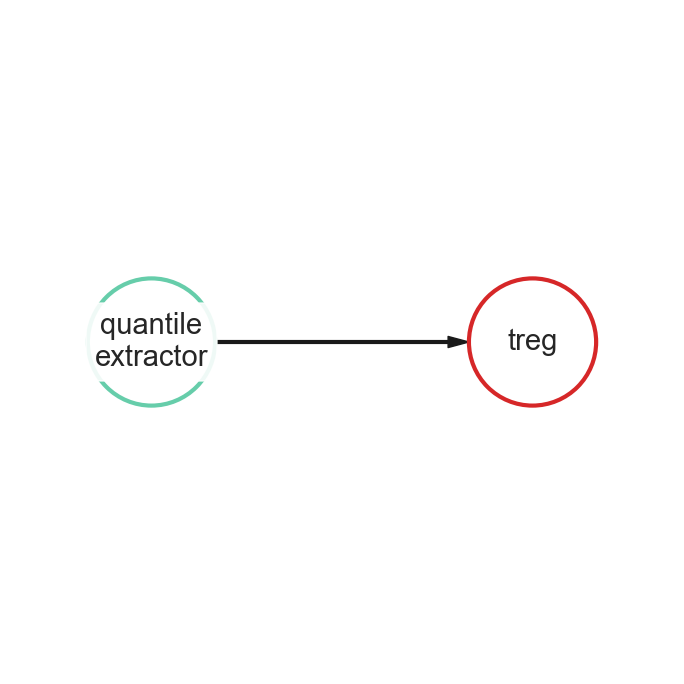

BIDMC32RR
[WinError 3] Системе не удается найти указанный путь: 'D:\\WORK\\Repo\\Industiral\\IndustrialTS\\benchmark\\results\\ts_regression\\BIDMC32RR'
For BIDMC32RR no results!
AustraliaRainfall
list index out of range
For AustraliaRainfall no results!
NewsHeadlineSentiment
Can't get attribute 'IndustrialMutations' on <module 'fedot_ind.core.repository.initializer_industrial_models' from 'D:\\WORK\\Repo\\Industiral\\IndustrialTS\\fedot_ind\\core\\repository\\initializer_industrial_models.py'>
For NewsHeadlineSentiment no results!
NewsTitleSentiment
Can't get attribute 'IndustrialMutations' on <module 'fedot_ind.core.repository.initializer_industrial_models' from 'D:\\WORK\\Repo\\Industiral\\IndustrialTS\\fedot_ind\\core\\repository\\initializer_industrial_models.py'>
For NewsTitleSentiment no results!
IEEEPPG
[Errno 2] No such file or directory: 'D:\\WORK\\Repo\\Industiral\\IndustrialTS\\benchmark\\results\\ts_regression\\IEEEPPG\\0_pipeline_saved\\0_pipeline_saved.json'
For IEEEPPG 

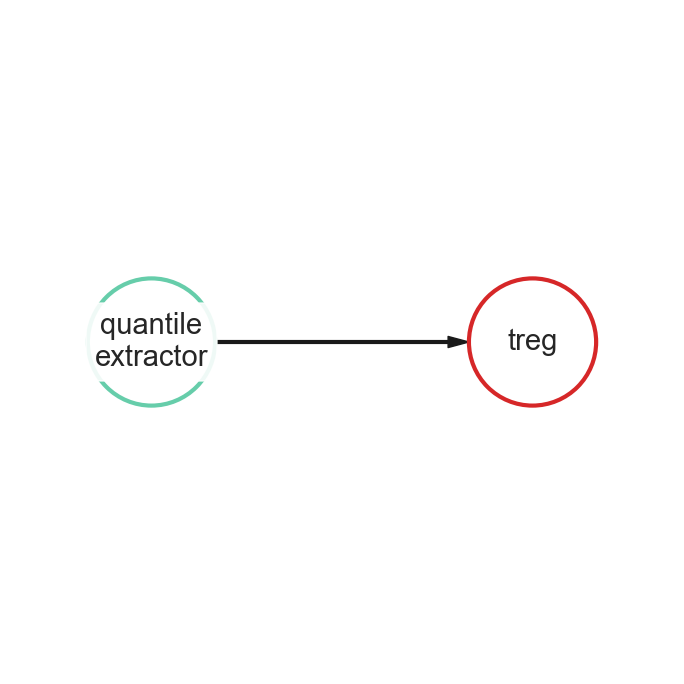

FloodModeling2


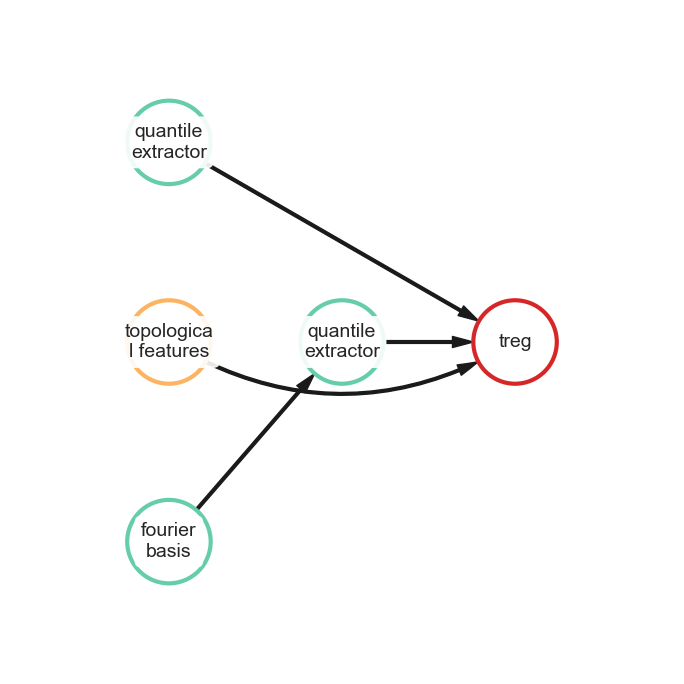

FloodModeling3


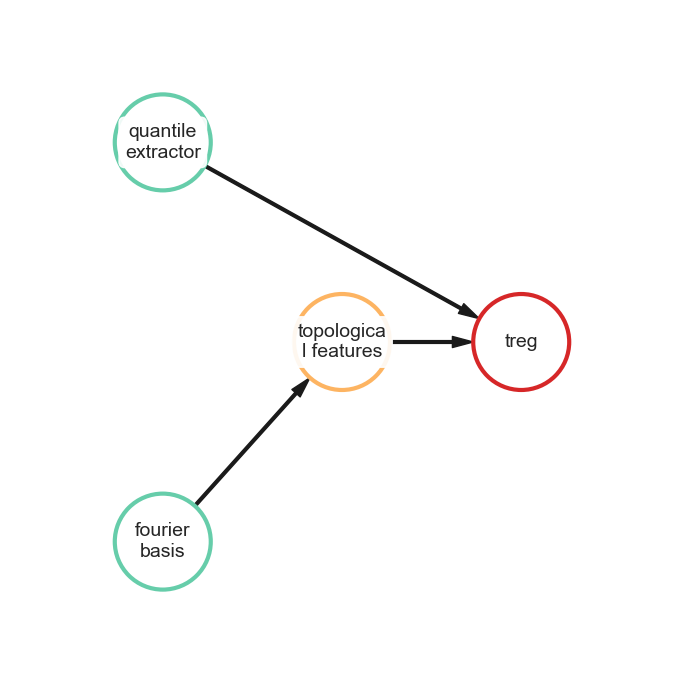

BeijingPM10Quality
No module named 'fedot_ind.core.operation.interfaces.industrial_decomposition_for_forecasting_strategy'
For BeijingPM10Quality no results!
BeijingPM25Quality
No module named 'fedot_ind.core.operation.interfaces.industrial_decomposition_for_forecasting_strategy'
For BeijingPM25Quality no results!
HouseholdPowerConsumption2
Can't get attribute 'IndustrialMutations' on <module 'fedot_ind.core.repository.initializer_industrial_models' from 'D:\\WORK\\Repo\\Industiral\\IndustrialTS\\fedot_ind\\core\\repository\\initializer_industrial_models.py'>
For HouseholdPowerConsumption2 no results!
LiveFuelMoistureContent
No module named 'fedot_ind.core.operation.interfaces.industrial_decomposition_for_forecasting_strategy'
For LiveFuelMoistureContent no results!
HouseholdPowerConsumption1
Can't get attribute 'IndustrialMutations' on <module 'fedot_ind.core.repository.initializer_industrial_models' from 'D:\\WORK\\Repo\\Industiral\\IndustrialTS\\fedot_ind\\core\\repository\\initiali

In [125]:
good_idx = reg_comp.sort_values(by='Difference %', ascending=True).iloc[:15, :].index.values
from pathlib import Path
from fedot.core.pipelines.pipeline import Pipeline
for idx in good_idx[1::]:
    try:
        print(idx)
        best_model = Path(path_to_datasets, idx)
        saved_pipeline = [x for x in os.listdir(best_model) if x.__contains__(prefix)][0]
        best_model = Path(path_to_datasets, idx,  saved_pipeline, f'{saved_pipeline}.json')
        pipeline = Pipeline().load(best_model)
        for i in pipeline.nodes:
            if i.name == 'fedot_regr':
                subpipeline = i.fitted_operation.model.current_pipeline
                print(subpipeline)
        pipeline.show()
    except Exception as e:
        print(e)
        print(f'For {idx} no results!')